# Effective Customer Retention

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [2]:
df = pd.read_csv("hotel_booking_cleaned.csv")

In [8]:
resort = df[df["hotel"]=="Resort Hotel"]
city = df[df["hotel"]=="City Hotel"]

**Proportion of Loyal Guests**

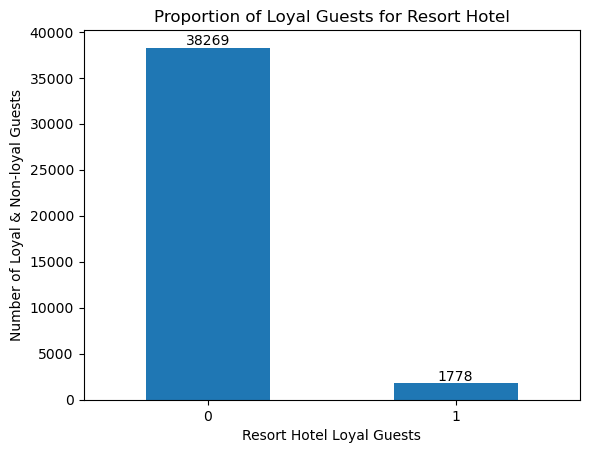

In [19]:
# Resort Hotel
ax = resort_guests.plot.bar()
plt.title('Proportion of Loyal Guests for Resort Hotel')
plt.xlabel('Resort Hotel Loyal Guests')
plt.ylabel('Number of Loyal & Non-loyal Guests')
plt.xticks(rotation=0)
for i, patch in enumerate(ax.patches):
    ax.annotate(str(patch.get_height()), 
                (patch.get_x() + patch.get_width() / 2, patch.get_height()), 
                ha='center', va='bottom')

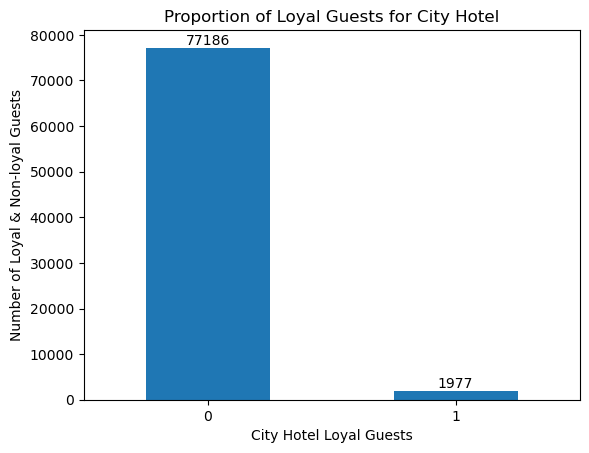

In [20]:
# City Hotel
ax = city_guests.plot.bar()
plt.title('Proportion of Loyal Guests for City Hotel')
plt.xlabel('City Hotel Loyal Guests')
plt.ylabel('Number of Loyal & Non-loyal Guests')
plt.xticks(rotation=0)
for i, patch in enumerate(ax.patches):
    ax.annotate(str(patch.get_height()), 
                (patch.get_x() + patch.get_width() / 2, patch.get_height()), 
                ha='center', va='bottom')

From EDA, it is found that only 4.6% and 2.5% are loyal guests of resort hotel and city hotel respectively. <br>
The hotels should strive to achieve better numbers by designing an effective customer retention strategy using data driven results.

**Data Preprocessing for Frequent Pattern Mining**

In [21]:
# Aggregating & converting to categorical features 

df["total_stay"] = df["stays_in_week_nights"] + df["stays_in_weekend_nights"]
df["total_stay_cat"] = df["total_stay"].map(lambda x:"short stay" if x<4 else ("Medium stay" if x <=7 else "Long stay"))

df["lead_time_cat"] = df["lead_time"].map(lambda x:"less than a month" if x<30 else "more than a month")

df["week_night_stay"] = df["stays_in_week_nights"].map(lambda x:"week night stay" if x>0 else "not week night stay")

df["total_guests"] = df["adults"] + df["children"] + df["babies"]
df["guests_type"] = df["total_guests"].map(lambda x:"single" if x==1 else "not single")

df["child"] = df["children"] + df["babies"]
df["got_kids"] = df["child"].map(lambda x:"with kids" if x>0 else "no kids")

df["special_request"] = df["total_of_special_requests"].map(lambda x:"special requests" if x>0 else "no special request")

df["parking"] = df["required_car_parking_spaces"].map(lambda x:"need parking space" if x>0 else "do not need parking space")

df["booking_change"] = df["booking_changes"].map(lambda x:"did booking changes" if x>0 else "no booking change")

month_to_quarter = {'January': 'Q1', 'February': 'Q1', 'March': 'Q1',\
                    'April': 'Q2', 'May': 'Q2', 'June': 'Q2',\
                   "July":"Q3","August":"Q3","September":"Q3",\
                   "October":"Q4","November":"Q4","December":"Q4"}
df["Quarter"] = df["arrival_date_month"].map(month_to_quarter)
df["Country_"] = df["country"].map(lambda x:"Portugual" if x=="PRT" else "Other Countries")

**Selecting Relevant Features**

In [22]:
select = ["hotel","Quarter","meal","Country_","market_segment","distribution_channel","is_repeated_guest",\
          "reserved_room_type","assigned_room_type","deposit_type","customer_type","adr","lead_time_cat","week_night_stay",\
          'total_stay_cat', 'guests_type', "got_kids", "special_request","parking","booking_change"]

**Creating Two Separate Dataframes for Resort Hotel and City Hotel**

In [23]:
df1 = df[select]
resort_hotel = df1[df1["hotel"]=="Resort Hotel"]
city_hotel = df1[df1["hotel"]=="City Hotel"]

In [24]:
resort_hotel["price_range"] = resort_hotel["adr"].map(lambda x:"Cheap room" if x<100 else "Not cheap")

C:\Users\User\AppData\Local\Temp\ipykernel_1872\811110746.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resort_hotel["price_range"] = resort_hotel["adr"].map(lambda x:"Cheap room" if x<100 else "Not cheap")


In [26]:
city_hotel["price_range"] = city_hotel["adr"].map(lambda x:"Cheap room" if x<100 else "Not cheap")

C:\Users\User\AppData\Local\Temp\ipykernel_1872\3961022860.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_hotel["price_range"] = city_hotel["adr"].map(lambda x:"Cheap room" if x<100 else "Not cheap")


**Dividing Repeated and Non-Repeated Guests into Separate Dataframes**

In [27]:
resort_hotel_loyal = resort_hotel[resort_hotel["is_repeated_guest"]==1]
resort_hotel_notloyal = resort_hotel[resort_hotel["is_repeated_guest"]==0]
city_hotel_loyal = city_hotel[city_hotel["is_repeated_guest"]==1]
city_hotel_notloyal = city_hotel[city_hotel["is_repeated_guest"]==0]

In [28]:
# Drop unnecessary columns
resort_hotel_loyal.drop(columns = ["hotel","adr","is_repeated_guest"],inplace=True)
resort_hotel_notloyal.drop(columns = ["hotel","adr","is_repeated_guest"],inplace=True)
city_hotel_loyal.drop(columns = ["hotel","adr","is_repeated_guest"],inplace=True)
city_hotel_notloyal.drop(columns = ["hotel","adr","is_repeated_guest"],inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_1872\3483963898.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resort_hotel_loyal.drop(columns = ["hotel","adr","is_repeated_guest"],inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_1872\3483963898.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resort_hotel_notloyal.drop(columns = ["hotel","adr","is_repeated_guest"],inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_1872\3483963898.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

**1) Frequent Pattern Mining for Loyal Guests of Resort Hotel**

In [29]:
te = TransactionEncoder()
te_ary = te.fit_transform(np.array(resort_hotel_loyal))

df_resort_loyal = pd.DataFrame(te_ary, columns=te.columns_)
# Generate frequent itemsets using Apriori algorithm
frequent_itemsets1 = apriori(df_resort_loyal, min_support=0.8, use_colnames=True)

# Display frequent itemsets
print(frequent_itemsets1)

     support                                  itemsets
0   0.897075                                      (BB)
1   0.840832                              (Cheap room)
2   0.996625                              (No Deposit)
3   0.840270                               (Portugual)
4   0.818335                               (Transient)
5   0.830709                       (less than a month)
6   0.805399                       (no booking change)
7   0.970754                                 (no kids)
8   0.849269                              (short stay)
9   0.803150                         (week night stay)
10  0.893701                          (No Deposit, BB)
11  0.871204                             (no kids, BB)
12  0.838020                  (Cheap room, No Deposit)
13  0.826209                     (no kids, Cheap room)
14  0.839145                   (Portugual, No Deposit)
15  0.818335                   (Transient, No Deposit)
16  0.827897           (less than a month, No Deposit)
17  0.8037

**2) Frequent Pattern Mining for Non-Loyal Guests of Resort Hotel**

In [30]:
te1 = TransactionEncoder()
te_ary1 = te1.fit_transform(np.array(resort_hotel_notloyal))
df_resort_notloyal = pd.DataFrame(te_ary1, columns=te1.columns_)
# Generate frequent itemsets using Apriori algorithm
frequent_itemsets2 = apriori(df_resort_notloyal, min_support=0.4, use_colnames=True)

# Display frequent itemsets
print(frequent_itemsets2)

      support                                           itemsets
0    0.576655                                                (A)
1    0.742324                                               (BB)
2    0.648384                                       (Cheap room)
3    0.413102                                      (Medium stay)
4    0.951527                                       (No Deposit)
..        ...                                                ...
662  0.412553  (not single, no kids, no booking change, Trans...
663  0.412606  (not single, no kids, do not need parking spac...
664  0.479814  (not single, no kids, do not need parking spac...
665  0.430505  (TA/TO, no kids, not single, do not need parki...
666  0.402728  (TA/TO, no kids, not single, do not need parki...

[667 rows x 2 columns]


**3) Frequent Pattern Mining for Loyal Guests of City Hotel**

In [31]:
te2 = TransactionEncoder()
te_ary2 = te2.fit_transform(np.array(city_hotel_loyal))
df_city_loyal = pd.DataFrame(te_ary2, columns=te2.columns_)
# Generate frequent itemsets using Apriori algorithm
frequent_itemsets3 = apriori(df_city_loyal, min_support=0.8, use_colnames=True)

# Display frequent itemsets
print(frequent_itemsets3)

     support                                           itemsets
0   0.858371                                                (A)
1   0.934750                                               (BB)
2   0.868488                                       (Cheap room)
3   0.968639                                       (No Deposit)
4   0.863429                                        (Portugual)
5   0.884674                        (do not need parking space)
6   0.843197                                (less than a month)
7   0.816894                                (no booking change)
8   0.977744                                          (no kids)
9   0.955994                                       (short stay)
10  0.805260                                  (week night stay)
11  0.828528                                    (No Deposit, A)
12  0.847749                                       (no kids, A)
13  0.828022                                    (short stay, A)
14  0.815377                            

**4) Frequent Pattern Mining for Non-Loyal Guests of City Hotel**

In [32]:
te3 = TransactionEncoder()
te_ary3 = te3.fit_transform(np.array(city_hotel_notloyal))
df_city_notloyal = pd.DataFrame(te_ary3, columns=te3.columns_)
# Generate frequent itemsets using Apriori algorithm
frequent_itemsets4 = apriori(df_city_notloyal, min_support=0.4, use_colnames=True)

# Display frequent itemsets
print(frequent_itemsets4)

       support                                           itemsets
0     0.793045                                                (A)
1     0.782331                                               (BB)
2     0.490568                                       (Cheap room)
3     0.833830                                       (No Deposit)
4     0.509432                                        (Not cheap)
...        ...                                                ...
1585  0.439885  (TA/TO, no kids, not single, do not need parki...
1586  0.405423  (TA/TO, no kids, do not need parking space, Ot...
1587  0.460576  (TA/TO, no kids, not single, do not need parki...
1588  0.445677  (TA/TO, no kids, not single, do not need parki...
1589  0.473506  (TA/TO, no kids, not single, do not need parki...

[1590 rows x 2 columns]


**Extracting Unique Traits (Frequent Patterns) of Loyal Guests of Resort Hotel**

In [34]:
# Resort Hotel loyal customers
set(frequent_itemsets1.reset_index()["itemsets"]) - set(frequent_itemsets2.reset_index()["itemsets"])

{frozenset({'less than a month'}),
 frozenset({'No Deposit', 'Portugual'}),
 frozenset({'No Deposit', 'Portugual', 'no kids'}),
 frozenset({'less than a month', 'no kids'}),
 frozenset({'No Deposit', 'less than a month', 'no kids'}),
 frozenset({'Portugual', 'no kids'}),
 frozenset({'No Deposit', 'less than a month'})}

**Extracting Unique Traits (Frequent Patterns) of Loyal Guests of City Hotel**

In [227]:
# City Hotel loyal customers
set(frequent_itemsets3.reset_index()["itemsets"]) - set(frequent_itemsets4.reset_index()["itemsets"])

{frozenset({'No Deposit', 'Portugual', 'short stay'}),
 frozenset({'less than a month', 'short stay'}),
 frozenset({'Portugual'}),
 frozenset({'BB', 'No Deposit', 'no kids', 'short stay'}),
 frozenset({'less than a month', 'no kids'}),
 frozenset({'BB', 'Portugual'}),
 frozenset({'less than a month'}),
 frozenset({'Portugual', 'short stay'}),
 frozenset({'No Deposit', 'less than a month'}),
 frozenset({'No Deposit', 'Portugual'}),
 frozenset({'Portugual', 'no kids'}),
 frozenset({'No Deposit', 'Portugual', 'no kids'}),
 frozenset({'Portugual', 'no kids', 'short stay'})}

**Actionable Insights from Analysis Results** 

**Unique Traits (Frequent Patterns) of Loyal Guests of Resort Hotel** <br>
-Loyal customers of resort hotel are mostly local customers (Portuguese) without kids. <br> 
-They tend to have a short lead time of less than a month and prefer not to pay deposit in advance.

**Customer Retention Strategy of Resort Hotel** <br>
-Focus hotel's marketing efforts towards local customers. <br>
-As they tend to arrange bookings closer to the travel date and do not like to pay deposit, hotel can add an option to save their details in booking page to create easy booking process. <br>
-As majority of customers (loyal or not) prefer cheaper rooms, the hotel can re-evaluate its pricing strategy for more expensive rooms to entice customers to book them more often.

**Unique Traits (Frequent Patterns) of Loyal Guests of City Hotel** <br>
-Loyal customers of the city hotel are also mostly local portuguese guests without kids and prefer breakfast and bed option.<br>
-They tend to book with a short lead time of less than a month, mainly have short stays typically lasting 1 to 3 days and do not prefer to pay deposits.

**Customer Retention Strategy of City Hotel**<br>
-Similarly to resort hotel, city hotel also should focus on local customers to become loyal customers. <br>
-As they tend to have -shorter duration of stay and prefer cheaper room price, the hotel can consider designing a loyalty program to collect points -that can be converted to free nights or upgrade to better rooms.